Updated: 30/01/24

The purpose of this workbook is to provide several tests of whether a particular quadratic qnm is indeed present in the ringdown.


### Tests

1. Plot the mismatch at different times during the ringdown ($t_0$) with and without the quadratic mode. This can be done for a single (l,m) or the full data. 
2. Plot the amplitude of the quadratic mode at different times during the ringdown ($t_0$). If it is really there it should decay in line with the decay time. 
3. Plot the quadratic amplitude [for (2,2,0,1)x(2,2,0,1)] against the linear amplitude (2,2,0,1) for a number of different simulations and look for quadratic scaling compared to the amplitude of the (4,4,0,1) mode, which shouldn't have the same relationship (see Mitman et al.).
4. Do the fits at different CCE levels and look for consistency. 
5. Let the frequency vary for the quadratic mode in the model and plot the mismatch.
6. Do the fits independently in (l,m) modes and check for amplitude ratio consistency. 
7. Try fits with (2,2,0,1)x(2,2,0,1) and (2,-2,0,-1)x(2,-2,0,-1). These should be mirror images, however noise may not be mirrored (though, it may be). 

Test for both a single mode {(4,4), (5,4), (6,4), (7,4)} and across all (l,m)s where possible. 

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction_tests.spatial_reconstruction import *
from matplotlib.animation import FuncAnimation
from scipy.interpolate import UnivariateSpline
from Visualisation.qnm_vis import * 
from qnmfitsrd.CCE_file_getter import *
import datetime
from scipy.optimize import least_squares

l_max = 5
n_max = 5

In [2]:
sim = CCE_to_sim_simplified(sim_num='0305')
#sim = qnmfits.SXS(ID=305, zero_time=(2,2))

In [3]:
quadratic_mode = [(2,2,0,1,2,2,0,1)]
#quadratic_mode = [(2,-2,0,-1,2,-2,0,-1)]
#quadratic_mode = [(2,-2,0,-1,2,2,0,1)]

## 1. Mismatch at different start times

Only (4,4)

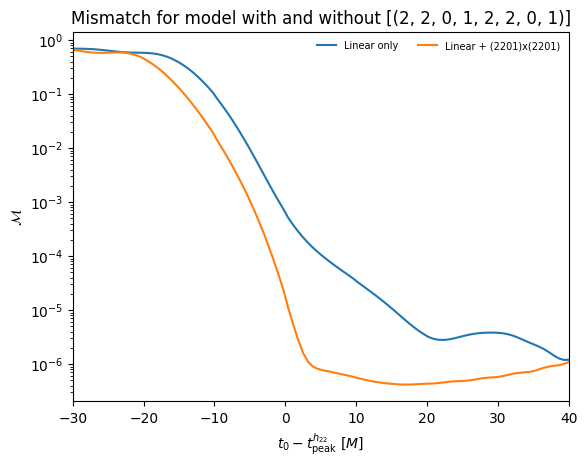

In [10]:
l_modes = [(4,4,n,1) for n in range(7+1)]

lq_modes = l_modes + quadratic_mode

mode_list = [l_modes, lq_modes]
mode_list_names = ['Linear only', 'Linear + (2201)x(2201)']

t0_array = np.linspace(-30, 40, 100)
fig, ax = plt.subplots(dpi=100)

for i, modes in enumerate(mode_list):

    mm_list = qnmfits.mismatch_t0_array(
        sim.times,
        sim.h[4,4],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0_array=t0_array
    )
    
    ax.semilogy(t0_array, mm_list, label=mode_list_names[i])

ax.set_title(f"Mismatch for model with and without {quadratic_mode}")    
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')

_ = ax.legend(ncol=2, frameon=False, fontsize=7)

The linear + quadratic model performs better for every (l,m) which is unexpected because it should only show up in m=4 modes? However, the mismatch for these unexpected modes is several orders of magnitude higher than for the (4,4) mode. 

All modes

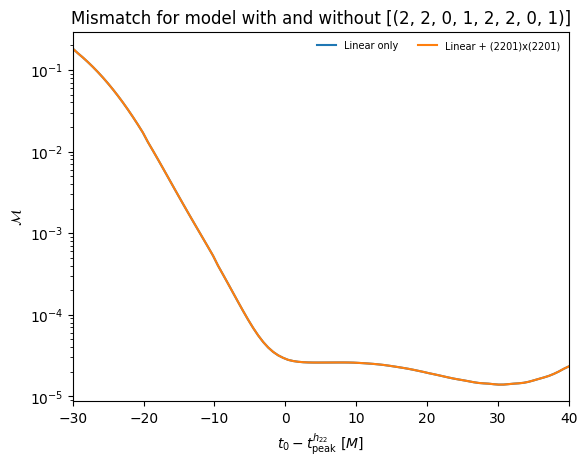

In [29]:
l_modes = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)]

lq_modes = l_modes + quadratic_mode

mode_list = [lq_modes, l_modes]
mode_list_names = ['Linear only', 'Linear + (2201)x(2201)']

t0_array = np.linspace(-30, 40, 100)
fig, ax = plt.subplots(dpi=100)

for i, modes in enumerate(mode_list):

    mm_list = qnmfits.mismatch_t0_array(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0_array=t0_array
    )
    
    ax.semilogy(t0_array, mm_list, label=mode_list_names[i])

ax.set_title(f"Mismatch for model with and without {quadratic_mode}")    
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')

_ = ax.legend(ncol=2, frameon=False, fontsize=7)

## 2. Amplitude over time

Single (l,m)

5.870450031694051


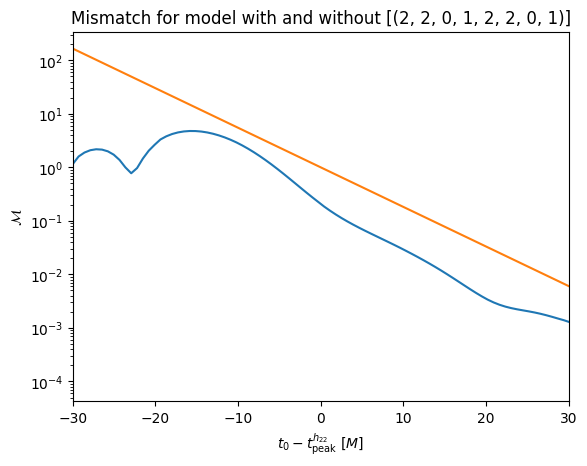

In [46]:
modes = [(4,4,n,1) for n in range(7+1)] + quadratic_mode

t0_array = np.linspace(-30, 40, 100)
fig, ax = plt.subplots(dpi=100)

C_list = [] 

for i, t0 in enumerate(t0_array):

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0
    )

    C_list.append(abs(best_fit['C'][-1]))

decay_time = -1 * 1/(qnmfits.qnm.omega(2,2,0,1,sim.chif_mag, Mf=sim.Mf)*2).imag
print(decay_time)

ax.plot(t0_array, C_list) 
ax.plot(t0_array, np.exp(-t0_array/decay_time))
ax.set_title(f"Mismatch for model with and without {quadratic_mode}")    
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')
ax.set_yscale('log')

ax.set_xlim(-30, 30)

_ = ax.legend(ncol=2, frameon=False, fontsize=7)

All (l,m)s 

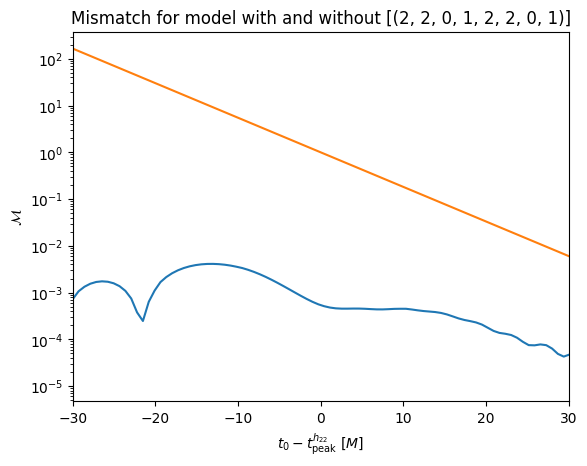

In [8]:
modes = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] + quadratic_mode

t0_array = np.linspace(-30, 40, 100)
fig, ax = plt.subplots(dpi=100)

C_list = [] 

for i, t0 in enumerate(t0_array):

    best_fit = qnmfits.multimode_ringdown_fit(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0
    )
    
    C_list.append(abs(best_fit['C'])[-1])

decay_time = -1 * 1/(qnmfits.qnm.omega(2,2,0,1,sim.chif_mag, Mf=sim.Mf)*2).imag

ax.plot(t0_array, C_list) 
ax.plot(t0_array, np.exp(-t0_array/decay_time))
ax.set_title(f"Mismatch for model with and without {quadratic_mode}")    
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')
ax.set_yscale('log')

ax.set_xlim(-30, 30)

_ = ax.legend(ncol=2, frameon=False, fontsize=7)

## 5. Let the frequency vary and plot the mismatch

Single (l,m)

100%|██████████| 100/100 [00:00<00:00, 1202.54it/s]


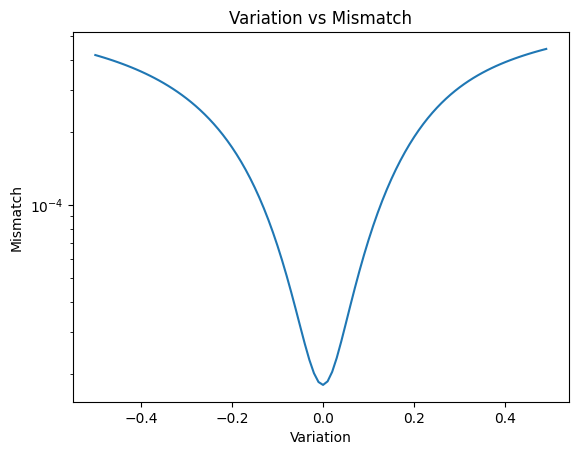

In [13]:
t0 = 0

modes = [(4,4,n,1) for n in range(7+1)] + quadratic_mode           

min = -0.5
max = 0.5
step = 0.01

variation = np.arange(min, max, step)

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))

mm_list = [] 
minmax = [min-step, max+step]

for i in tqdm(variation):

    modified_frequencies = frequencies.copy()

    modified_frequencies.real[-1] = modified_frequencies.real[-1] * (1 + i)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0,
        frequencies = modified_frequencies
    )

    mm_list.append(best_fit['mismatch'])

plt.plot(variation, mm_list)
plt.xlabel('Variation')
plt.ylabel('Mismatch')
plt.title('Variation vs Mismatch')
plt.yscale('log')
plt.show()

100%|██████████| 10/10 [00:00<00:00, 120.81it/s]


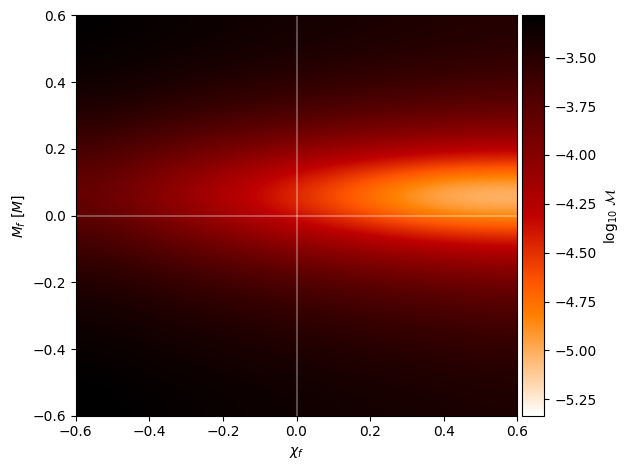

In [15]:
t0 = 0

modes = [(4,4,n,1) for n in range(7+1)] + quadratic_mode

min = -0.5
max = 0.5
step = 0.1

variation = np.arange(min, max, step)

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))

mm_list = [] 
minmax = [min-step, max+step]

for i in tqdm(variation):
    for j in variation:

        modified_frequencies = frequencies.copy()

        modified_frequencies.real[-1] = modified_frequencies.real[-1] * (1 + i)
        modified_frequencies.imag[-1] = modified_frequencies.imag[-1] * (1 + j)

        best_fit = qnmfits.ringdown_fit(
            sim.times,
            sim.h[4,4],
            modes,
            Mf=sim.Mf,
            chif=sim.chif_mag,
            t0=t0,
            frequencies = modified_frequencies
        )

        mm_list.append(best_fit['mismatch'])

mm_grid = np.reshape(
    np.array(mm_list), (len(variation), len(variation))
    )

qnmfits.plot_mismatch_M_chi_grid(
    mm_grid,
    minmax,
    minmax,
    truth=[0, 0],
    fig_kw={'dpi':100}
)

Multiple (l,m)s

100%|██████████| 100/100 [06:24<00:00,  3.84s/it]


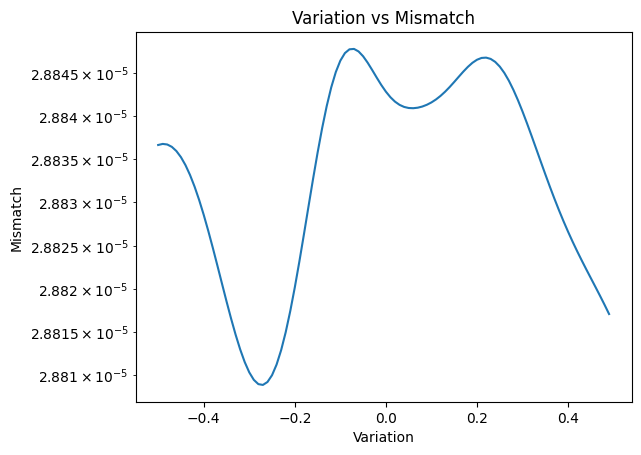

In [14]:
t0 = 0

modes = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] + quadratic_mode               

min = -0.5
max = 0.5
step = 0.01

variation = np.arange(min, max, step)

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))

mm_list = [] 
minmax = [min-step, max+step]

for i in tqdm(variation):

    modified_frequencies = frequencies.copy()

    modified_frequencies.real[-1] = modified_frequencies.real[-1] * (1 + i)

    best_fit = qnmfits.multimode_ringdown_fit(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0,
        frequencies = modified_frequencies
    )

    mm_list.append(best_fit['mismatch'])

plt.plot(variation, mm_list)
plt.xlabel('Variation')
plt.ylabel('Mismatch')
plt.title('Variation vs Mismatch')
plt.yscale('log')
plt.show()


100%|██████████| 10/10 [06:31<00:00, 39.16s/it]


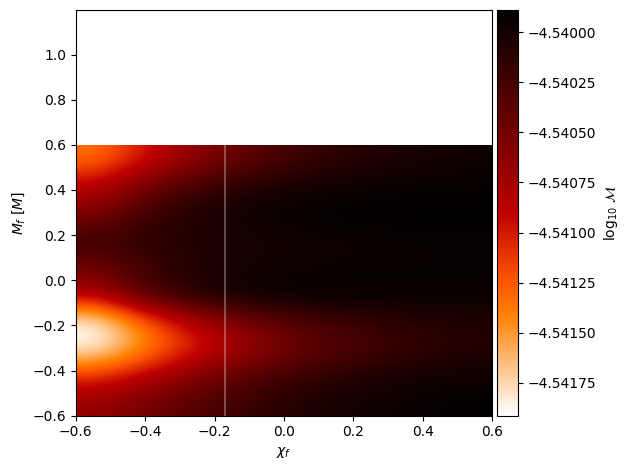

In [70]:
t0 = 0

modes = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] + quadratic_mode               

min = -0.5
max = 0.5
step = 0.1

variation = np.arange(min, max, step)

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))

mm_list = [] 
minmax = [min-step, max+step]

for i in tqdm(variation):
    for j in variation:

        modified_frequencies = frequencies.copy()

        modified_frequencies.real[-1] = modified_frequencies.real[-1] * (1 + i)
        modified_frequencies.imag[-1] = modified_frequencies.imag[-1] * (1 + j)

        best_fit = qnmfits.multimode_ringdown_fit(
            sim.times,
            sim.h,
            modes,
            Mf=sim.Mf,
            chif=sim.chif_mag,
            t0=t0,
            frequencies = modified_frequencies
        )

        mm_list.append(best_fit['mismatch'])

mm_grid = np.reshape(
    np.array(mm_list), (len(variation), len(variation))
    )

qnmfits.plot_mismatch_M_chi_grid(
    mm_grid,
    minmax,
    minmax,
    truth=[0, 0],
    fig_kw={'dpi':100}
)


## 3. Reproduction of Mitman et al. 2023 (with available CCE files)

In [17]:
CCE_sim1 = CCE_to_sim_simplified(sim_num='0001')
CCE_sim2 = CCE_to_sim_simplified(sim_num='0002')
CCE_sim3 = CCE_to_sim_simplified(sim_num='0003')
CCE_sim4 = CCE_to_sim_simplified(sim_num='0004')
CCE_sim5 = CCE_to_sim_simplified(sim_num='0005')
CCE_sim6 = CCE_to_sim_simplified(sim_num='0006')
CCE_sim7 = CCE_to_sim_simplified(sim_num='0007')
CCE_sim8 = CCE_to_sim_simplified(sim_num='0008')
CCE_sim9 = CCE_to_sim_simplified(sim_num='0009')
CCE_sim10 = CCE_to_sim_simplified(sim_num='0010')
CCE_sim11 = CCE_to_sim_simplified(sim_num='0011')
CCE_sim12 = CCE_to_sim_simplified(sim_num='0012')
CCE_sim13 = CCE_to_sim_simplified(sim_num='0013')


In [65]:
sim_1502 = qnmfits.SXS(ID=1502, zero_time=(2,2))
sim_1476 = qnmfits.SXS(ID=1476, zero_time=(2,2))
sim_1506 = qnmfits.SXS(ID=1506, zero_time=(2,2))
sim_1508 = qnmfits.SXS(ID=1508, zero_time=(2,2))
sim_1474 = qnmfits.SXS(ID=1474, zero_time=(2,2))
sim_1505 = qnmfits.SXS(ID=1505, zero_time=(2,2))
sim_1504 = qnmfits.SXS(ID=1504, zero_time=(2,2))
sim_1485 = qnmfits.SXS(ID=1485, zero_time=(2,2))
sim_1486 = qnmfits.SXS(ID=1486, zero_time=(2,2))
sim_1441 = qnmfits.SXS(ID=1441, zero_time=(2,2))
sim_1500 = qnmfits.SXS(ID=1500, zero_time=(2,2))
sim_1492 = qnmfits.SXS(ID=1492, zero_time=(2,2))
sim_1465 = qnmfits.SXS(ID=1465, zero_time=(2,2))
sim_1458 = qnmfits.SXS(ID=1458, zero_time=(2,2))
sim_1438 = qnmfits.SXS(ID=1438, zero_time=(2,2))
sim_1430 = qnmfits.SXS(ID=1430, zero_time=(2,2))

/data/rvnd2/python_envs/python-3.11-clone/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:1502v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1502v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 83.0M/83.0M [00:13<00:00, 6.54MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 80.4M/80.4M [00:12<00:00, 6.58MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1506v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1506v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 82.8M/82.8M [00:13<00:00, 6.25MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1508v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1508v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 83.7M/83.7M [00:13<00:00, 6.29MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1474v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1474v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 81.5M/81.5M [00:13<00:00, 6.17MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1505v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1505v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 83.3M/83.3M [00:14<00:00, 6.02MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1504v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1504v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 84.4M/84.4M [00:13<00:00, 6.40MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1485v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1485v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 84.8M/84.8M [00:13<00:00, 6.57MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1486v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1486v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 86.5M/86.5M [00:13<00:00, 6.87MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1441v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1441v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 96.0M/96.0M [00:15<00:00, 6.34MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1500v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1500v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 79.7M/79.7M [00:13<00:00, 6.42MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1492v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1492v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 78.5M/78.5M [00:12<00:00, 6.40MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1465v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1465v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 78.6M/78.6M [00:14<00:00, 5.85MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1458v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1458v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 80.8M/80.8M [00:13<00:00, 6.17MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1438v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1438v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 85.1M/85.1M [00:13<00:00, 6.61MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:1430v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1430v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 88.3M/88.3M [00:13<00:00, 6.76MB/s]


In [165]:
start_times = [0.0, 2.0, 4.0, 6.0]

#sims = [CCE_sim1, CCE_sim2, CCE_sim3, CCE_sim4, CCE_sim5, CCE_sim6, CCE_sim7, CCE_sim8, CCE_sim9, CCE_sim10, CCE_sim11, CCE_sim12, CCE_sim13]
sims = [sim_1502, sim_1476, sim_1506, sim_1508, sim_1474, sim_1505, sim_1504, sim_1485, sim_1486, sim_1441, sim_1500, sim_1492, sim_1465, 
        sim_1458, sim_1438, sim_1430]

amp_array = np.zeros((5, len(start_times), len(sims)))

model_l1 = [(2,2,n,1) for n in range(1+1)]
model_l2 = [(4,4,n,1) for n in range(2+1)]
model_q = [(4,4,n,1) for n in range(1+1)] + [(2,2,0,1,2,2,0,1)]

l1_amp_index = model_l1.index((2,2,0,1))
l2_amp_index = model_l2.index((4,4,0,1))
q_amp_index = model_q.index((2,2,0,1,2,2,0,1))

for j, t0 in enumerate(start_times):

    for i, s in enumerate(sims):

        best_fit_l1 = qnmfits.ringdown_fit(
            s.times,
            #s.h,
            s.h[2,2],
            model_l1,
            Mf=s.Mf,
            chif=s.chif_mag,
            t0=t0,
            #spherical_modes=[(2,2)]
        )

        amp_array[0][j][i] = abs(best_fit_l1['C'][l1_amp_index])

        best_fit_l2 = qnmfits.ringdown_fit(
            s.times,
            #s.h,
            s.h[4,4],
            model_l2,
            Mf=s.Mf,
            chif=s.chif_mag,
            t0=t0,
            #spherical_modes=[(4,4)]
        )

        amp_array[1][j][i] = abs(best_fit_l2['C'][l2_amp_index])

        best_fit_q = qnmfits.ringdown_fit(
            s.times,
            #s.h,
            s.h[4,4],
            model_q,
            Mf=s.Mf,
            chif=s.chif_mag,
            t0=t0,
            #spherical_modes=[(4,4)]
        )

        amp_array[2][j][i] = abs(best_fit_q['C'][q_amp_index])

        amp_array[3][j][i] = s.m1 / s.m2

        amp_array[4][j][i] = s.chif_mag



In [166]:
def quadratic_model_error(a, x, y):
    return a * x**2 - y

coefs = [] 

for j, _ in enumerate(start_times): 

    x_data = amp_array[0][j]
    y_data = amp_array[2][j]

    # Initial guess for the parameters
    initial_params = [1]

    # Perform the least squares fit
    result = least_squares(quadratic_model_error, initial_params, args=(x_data, y_data))

    # Extract the fitted parameters
    fitted_params = result.x 

    # Print the fitted parameters
    print("Fitted Parameters:")
    print("a =", fitted_params[0])

    a = fitted_params[0]
    coefs.append(a) 


Fitted Parameters:
a = 0.39889508225885684
Fitted Parameters:
a = 0.39434145104774254
Fitted Parameters:
a = 0.37541762999705086
Fitted Parameters:
a = 0.3456665402132785


/tmp/ipykernel_8967/1610169498.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


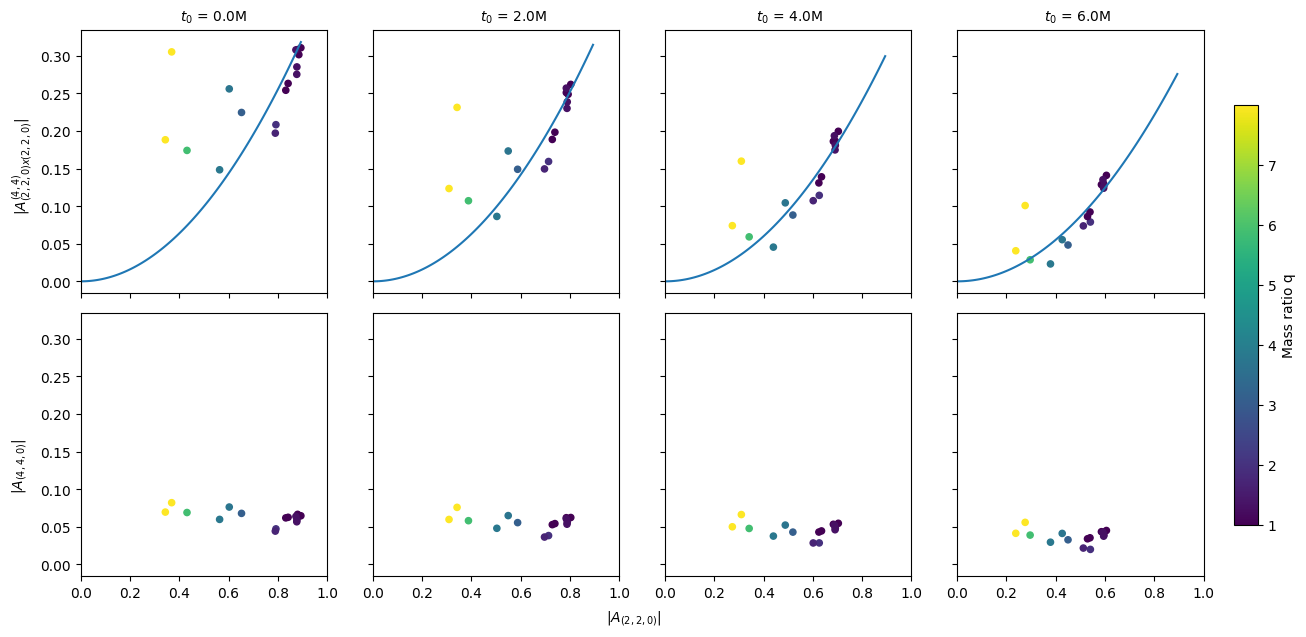

In [170]:
xs = np.linspace(0, np.max(amp_array[0]), 100)

fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)

plot1 = axs[0,0].scatter(amp_array[0][0], amp_array[2][0], c=amp_array[3][0], s=20)
axs[0,0].plot(xs, coefs[0]*xs**2)

axs[0,1].scatter(amp_array[0][1], amp_array[2][1], c=amp_array[3][1], s=20)
axs[0,1].plot(xs, coefs[1]*xs**2)

axs[0,2].scatter(amp_array[0][2], amp_array[2][2], c=amp_array[3][2], s=20)
axs[0,2].plot(xs, coefs[2]*xs**2)

axs[0,3].scatter(amp_array[0][3], amp_array[2][3], c=amp_array[3][3], s=20)
axs[0,3].plot(xs, coefs[3]*xs**2)

axs[1,0].scatter(amp_array[0][0], amp_array[1][0], c=amp_array[3][0], s=20)
axs[1,1].scatter(amp_array[0][1], amp_array[1][1], c=amp_array[3][1], s=20)
axs[1,2].scatter(amp_array[0][2], amp_array[1][2], c=amp_array[3][2], s=20)
axs[1,3].scatter(amp_array[0][3], amp_array[1][3], c=amp_array[3][3], s=20)

for ax in axs.flat:
    ax.set_xlim(0, 1)

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  
fig.colorbar(plot1, cax=cbar_ax, label='Mass ratio q')

fig.text(0.5, -0.01, r'$|A_{(2,2,0)}|$', ha='center')
fig.text(0.15, 0.99, f'$t_0$ = {start_times[0]}M', ha='center')
fig.text(0.4, 0.99, f'$t_0$ = {start_times[1]}M', ha='center')
fig.text(0.63, 0.99, f'$t_0$ = {start_times[2]}M', ha='center')
fig.text(0.87, 0.99, f'$t_0$ = {start_times[3]}M', ha='center')
fig.text(-0.02, 0.25, r'$|A_{(4,4,0)}|$', va='center', rotation='vertical')
fig.text(-0.02, 0.75, r'$|A_{(2,2,0)x(2,2,0)}^{(4,4)}|$', va='center', rotation='vertical')


plt.tight_layout()